<a href="https://colab.research.google.com/github/sindla97/Causal_inference_twins/blob/main/Causal_inference_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

# !pip install dowhy
from dowhy import CausalModel
import dowhy.datasets

In [2]:
import pandas as pd


tp_t=pd.read_csv('/twin_pairs_T_3years_samesex.csv')
tp_x=pd.read_csv('/twin_pairs_X_3years_samesex.csv')
tp_y=pd.read_csv('/twin_pairs_Y_3years_samesex.csv')

In [3]:
tp_t.head()

,Unnamed: 0,dbirwt_0,dbirwt_1
0,0,2268.0,2296.0
1,1,2610.0,2650.0
2,2,1985.0,2098.0
3,3,2410.0,2420.0
4,4,2013.0,2637.0


In [4]:
tp_x.head()

,Unnamed: 0.1,Unnamed: 0,pldel,birattnd,brstate,stoccfipb,mager8,ormoth,mrace,meduc6,...,feduc6,infant_id_0,infant_id_1,dlivord_min,dtotord_min,bord_0,bord_1,brstate_reg,stoccfipb_reg,mplbir_reg
0,0,0,1.0,1.0,1,1,3,0.0,1,NaN,...,NaN,1,0,NaN,NaN,NaN,NaN,5,5,1.0
1,1,1,1.0,1.0,1,1,3,0.0,2,3.0,...,NaN,7,6,2.0,3.0,2.0,1.0,5,5,5.0
2,2,2,1.0,1.0,1,1,5,0.0,1,5.0,...,3.0,11,10,NaN,NaN,NaN,NaN,5,5,1.0
3,3,3,1.0,1.0,1,1,4,0.0,2,1.0,...,1.0,15,14,4.0,4.0,1.0,2.0,5,5,5.0
4,4,4,1.0,1.0,1,1,5,0.0,2,4.0,...,NaN,23,22,NaN,NaN,NaN,NaN,5,5,5.0


In [5]:
tp_y.head()

,Unnamed: 0,mort_0,mort_1
0,0,0.0,0.0
1,1,0.0,0.0
2,2,0.0,0.0
3,3,0.0,0.0
4,4,0.0,0.0


In [6]:
print(tp_y.shape, tp_x.shape, tp_t.shape)

(71345, 3) (71345, 54) (71345, 3)


In [7]:
df=tp_t.merge(tp_y, how ='inner', on='Unnamed: 0')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71345 entries, 0 to 71344
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  71345 non-null  int64  
 1   dbirwt_0    71345 non-null  float64
 2   dbirwt_1    71345 non-null  float64
 3   mort_0      71345 non-null  float64
 4   mort_1      71345 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 2.7 MB


In [8]:
df['heavy_1']=df.apply(lambda x: 1 if x['dbirwt_1']> x['dbirwt_0'] else 0 , axis=1)
df['heavy']=df.apply(lambda x: 1 if x['dbirwt_0']> x['dbirwt_1'] else 0 , axis=1)
df

,Unnamed: 0,dbirwt_0,dbirwt_1,mort_0,mort_1,heavy_1,heavy
0,0,2268.0,2296.0,0.0,0.0,1,0
1,1,2610.0,2650.0,0.0,0.0,1,0
2,2,1985.0,2098.0,0.0,0.0,1,0
3,3,2410.0,2420.0,0.0,0.0,1,0
4,4,2013.0,2637.0,0.0,0.0,1,0
...,...,...,...,...,...,...,...
71340,71340,2807.0,3260.0,0.0,0.0,1,0
71341,71341,2510.0,2650.0,0.0,0.0,1,0
71342,71342,2130.0,2175.0,0.0,0.0,1,0
71343,71343,2693.0,3317.0,0.0,0.0,1,0


In [9]:
temp_df=df[['Unnamed: 0','dbirwt_1', 'mort_1', 'heavy_1']]
temp_df=temp_df.rename(columns={'dbirwt_1':'dbirwt_0', 'mort_1':'mort_0', 'heavy_1':'heavy'})
temp_df

,Unnamed: 0,dbirwt_0,mort_0,heavy
0,0,2296.0,0.0,1
1,1,2650.0,0.0,1
2,2,2098.0,0.0,1
3,3,2420.0,0.0,1
4,4,2637.0,0.0,1
...,...,...,...,...
71340,71340,3260.0,0.0,1
71341,71341,2650.0,0.0,1
71342,71342,2175.0,0.0,1
71343,71343,3317.0,0.0,1


In [10]:
concat_df=pd.concat([df[['Unnamed: 0','dbirwt_0', 'mort_0', 'heavy']],temp_df],axis=0)

In [85]:
final_df=concat_df.merge(tp_x,how='inner',on='Unnamed: 0')
final_df

,Unnamed: 0,dbirwt_0,mort_0,heavy,Unnamed: 0.1,pldel,birattnd,brstate,stoccfipb,mager8,...,feduc6,infant_id_0,infant_id_1,dlivord_min,dtotord_min,bord_0,bord_1,brstate_reg,stoccfipb_reg,mplbir_reg
0,0,2268.0,0.0,0,0,1.0,1.0,1,1,3,...,NaN,1,0,NaN,NaN,NaN,NaN,5,5,1.0
1,1,2610.0,0.0,0,1,1.0,1.0,1,1,3,...,NaN,7,6,2.0,3.0,2.0,1.0,5,5,5.0
2,2,1985.0,0.0,0,2,1.0,1.0,1,1,5,...,3.0,11,10,NaN,NaN,NaN,NaN,5,5,1.0
3,3,2410.0,0.0,0,3,1.0,1.0,1,1,4,...,1.0,15,14,4.0,4.0,1.0,2.0,5,5,5.0
4,4,2013.0,0.0,0,4,1.0,1.0,1,1,5,...,NaN,23,22,NaN,NaN,NaN,NaN,5,5,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142685,71340,3260.0,0.0,1,71340,1.0,1.0,51,56,4,...,3.0,279048,279047,5.0,5.0,2.0,1.0,7,7,7.0
142686,71341,2650.0,0.0,1,71341,1.0,1.0,51,56,4,...,2.0,279050,279049,6.0,7.0,2.0,1.0,7,7,7.0
142687,71342,2175.0,0.0,1,71342,1.0,1.0,51,56,2,...,2.0,279057,279058,1.0,1.0,1.0,2.0,7,7,8.0
142688,71343,3317.0,0.0,1,71343,1.0,1.0,51,56,5,...,5.0,279060,279059,3.0,3.0,2.0,1.0,7,7,7.0


In [41]:
print(final_df.columns.to_list())

['Unnamed: 0', 'dbirwt_0', 'mort_0', 'heavy', 'Unnamed: 0.1', 'pldel', 'birattnd', 'brstate', 'stoccfipb', 'mager8', 'ormoth', 'mrace', 'meduc6', 'dmar', 'mplbir', 'mpre5', 'adequacy', 'orfath', 'frace', 'birmon', 'gestat10', 'csex', 'anemia', 'cardiac', 'lung', 'diabetes', 'herpes', 'hydra', 'hemo', 'chyper', 'phyper', 'eclamp', 'incervix', 'pre4000', 'preterm', 'renal', 'rh', 'uterine', 'othermr', 'tobacco', 'alcohol', 'cigar6', 'drink5', 'crace', 'data_year', 'nprevistq', 'dfageq', 'feduc6', 'infant_id_0', 'infant_id_1', 'dlivord_min', 'dtotord_min', 'bord_0', 'bord_1', 'brstate_reg', 'stoccfipb_reg', 'mplbir_reg']


In [86]:
final_df.drop(columns=['Unnamed: 0','Unnamed: 0.1'],inplace=True)

In [87]:
final_df['bord']=final_df.apply(lambda x: x['bord_0'] if x['heavy']==0 else x['bord_1'], axis=1)
final_df

,dbirwt_0,mort_0,heavy,pldel,birattnd,brstate,stoccfipb,mager8,ormoth,mrace,...,infant_id_0,infant_id_1,dlivord_min,dtotord_min,bord_0,bord_1,brstate_reg,stoccfipb_reg,mplbir_reg,bord
0,2268.0,0.0,0,1.0,1.0,1,1,3,0.0,1,...,1,0,NaN,NaN,NaN,NaN,5,5,1.0,NaN
1,2610.0,0.0,0,1.0,1.0,1,1,3,0.0,2,...,7,6,2.0,3.0,2.0,1.0,5,5,5.0,2.0
2,1985.0,0.0,0,1.0,1.0,1,1,5,0.0,1,...,11,10,NaN,NaN,NaN,NaN,5,5,1.0,NaN
3,2410.0,0.0,0,1.0,1.0,1,1,4,0.0,2,...,15,14,4.0,4.0,1.0,2.0,5,5,5.0,1.0
4,2013.0,0.0,0,1.0,1.0,1,1,5,0.0,2,...,23,22,NaN,NaN,NaN,NaN,5,5,5.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142685,3260.0,0.0,1,1.0,1.0,51,56,4,0.0,3,...,279048,279047,5.0,5.0,2.0,1.0,7,7,7.0,1.0
142686,2650.0,0.0,1,1.0,1.0,51,56,4,0.0,3,...,279050,279049,6.0,7.0,2.0,1.0,7,7,7.0,1.0
142687,2175.0,0.0,1,1.0,1.0,51,56,2,0.0,1,...,279057,279058,1.0,1.0,1.0,2.0,7,7,8.0,2.0
142688,3317.0,0.0,1,1.0,1.0,51,56,5,0.0,1,...,279060,279059,3.0,3.0,2.0,1.0,7,7,7.0,1.0


In [88]:
final_df.drop(columns=['bord_1','bord_0'],inplace=True)

In [89]:
final_df.drop(columns=['infant_id_0','infant_id_1'],inplace=True)

In [90]:
final_df.drop(columns=['data_year'],inplace=True)

In [81]:
final_df=final_df.loc[final_df.isnull().sum(axis=1)==0,:]

In [91]:
notnulldf=final_df.isnull().sum().reset_index()
lists=notnulldf[notnulldf[0]==0]['index'].tolist()

In [92]:
final_df[lists].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142690 entries, 0 to 142689
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   dbirwt_0       142690 non-null  float64
 1   mort_0         142690 non-null  float64
 2   heavy          142690 non-null  int64  
 3   brstate        142690 non-null  int64  
 4   stoccfipb      142690 non-null  int64  
 5   mager8         142690 non-null  int64  
 6   mrace          142690 non-null  int64  
 7   dmar           142690 non-null  int64  
 8   birmon         142690 non-null  int64  
 9   gestat10       142690 non-null  int64  
 10  csex           142690 non-null  int64  
 11  crace          142690 non-null  int64  
 12  brstate_reg    142690 non-null  int64  
 13  stoccfipb_reg  142690 non-null  int64  
dtypes: float64(2), int64(12)
memory usage: 15.2 MB


In [95]:
model=CausalModel(data=final_df,
             treatment='heavy',
             outcome='mort_0',
             common_causes=[x for x in lists if x not in ['heavy','mort_0']])

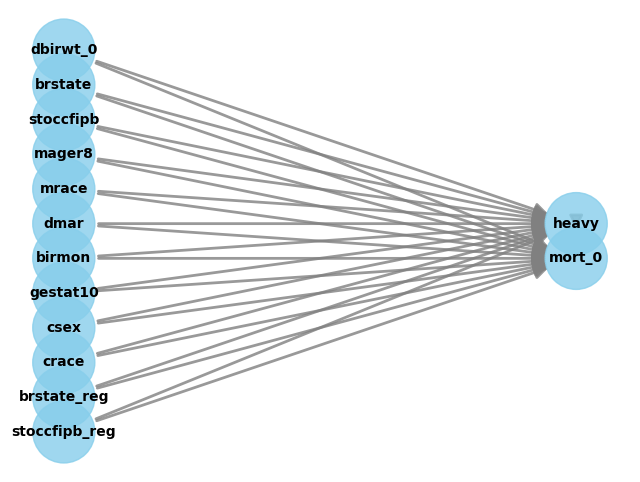

In [96]:
model.view_model()

In [65]:
!pip install networkx==3.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.8 MB/s eta 0:00:00
  Attempting uninstall: networkx
    Found existing installation: networkx 3.5
    Uninstalling networkx-3.5:
      Successfully uninstalled networkx-3.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cuda-cupti-cu12 12.5.82 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-nvrtc-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cuda-nvrtc-cu12 12.5.82 which is incompatible.
torch 2.6.0+cu124 requires nvidia-

In [97]:
identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand)

Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
   d                                                                           ↪
────────(E[mort_0|mager8,birmon,gestat10,brstate,dbirwt_0,dmar,mrace,stoccfipb ↪
d[heavy]                                                                       ↪

↪                                        
↪ _reg,stoccfipb,csex,crace,brstate_reg])
↪                                        
Estimand assumption 1, Unconfoundedness: If U→{heavy} and U→mort_0 then P(mort_0|heavy,mager8,birmon,gestat10,brstate,dbirwt_0,dmar,mrace,stoccfipb_reg,stoccfipb,csex,crace,brstate_reg,U) = P(mort_0|heavy,mager8,birmon,gestat10,brstate,dbirwt_0,dmar,mrace,stoccfipb_reg,stoccfipb,csex,crace,brstate_reg)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



In [22]:
!pip install econml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 37.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 43.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 61.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 24.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.4/259.4 kB 17.6 MB/s eta 0:00:00
  Attempting uninstall: slicer
    Found existing installation: slicer 0.0.8
    Uninstalling slicer-0.0.8:
      Successfully uninstalled slicer-0.0.8
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
  Attempting uninstall: shap
    Found existing

In [99]:
import econml
from sklearn.linear_model import LassoCV
from sklearn.ensemble import GradientBoostingRegressor, HistGradientBoostingRegressor
from econml.inference import BootstrapInference
dml_estimate = model.estimate_effect(identified_estimand, method_name="backdoor.econml.dml.DML",
                                     control_value = 0,
                                     treatment_value = 1,
                                     target_units ='ate',
                                method_params={"init_params":{'model_y':HistGradientBoostingRegressor(),
                                                              'model_t': HistGradientBoostingRegressor(),
                                                              "model_final":HistGradientBoostingRegressor()},
                                               "fit_params":{}})
print(dml_estimate)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
   d                                                                           ↪
────────(E[mort_0|mager8,birmon,gestat10,brstate,dbirwt_0,dmar,mrace,stoccfipb ↪
d[heavy]                                                                       ↪

↪                                        
↪ _reg,stoccfipb,csex,crace,brstate_reg])
↪                                        
Estimand assumption 1, Unconfoundedness: If U→{heavy} and U→mort_0 then P(mort_0|heavy,mager8,birmon,gestat10,brstate,dbirwt_0,dmar,mrace,stoccfipb_reg,stoccfipb,csex,crace,brstate_reg,U) = P(mort_0|heavy,mager8,birmon,gestat10,brstate,dbirwt_0,dmar,mrace,stoccfipb_reg,stoccfipb,csex,crace,brstate_reg)

## Realized estimand
b: mort_0~heavy+mager8+birmon+gestat10+brstate+dbirwt_0+dmar+mrace+stoccfipb_reg+stoccfipb+csex+crace+brstate_reg | 
Target units: ate

## Estimate

The final model has a nonzero intercept for at least one outcome; it will be subtracted, but consider fitting a model without an intercept if possible.


In [98]:
causal_estimate = model.estimate_effect(identified_estimand,
        method_name="backdoor.propensity_score_stratification")
print(causal_estimate)

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
   d                                                                           ↪
────────(E[mort_0|mager8,birmon,gestat10,brstate,dbirwt_0,dmar,mrace,stoccfipb ↪
d[heavy]                                                                       ↪

↪                                        
↪ _reg,stoccfipb,csex,crace,brstate_reg])
↪                                        
Estimand assumption 1, Unconfoundedness: If U→{heavy} and U→mort_0 then P(mort_0|heavy,mager8,birmon,gestat10,brstate,dbirwt_0,dmar,mrace,stoccfipb_reg,stoccfipb,csex,crace,brstate_reg,U) = P(mort_0|heavy,mager8,birmon,gestat10,brstate,dbirwt_0,dmar,mrace,stoccfipb_reg,stoccfipb,csex,crace,brstate_reg)

## Realized estimand
b: mort_0~heavy+mager8+birmon+gestat10+brstate+dbirwt_0+dmar+mrace+stoccfipb_reg+stoccfipb+csex+crace+brstate_reg
Target units: ate

## Estimate
Me